In [1]:
import requests
import requests
import brotlicffi
import json
import io
base_url = "https://api.godelterminal.com/api/optionsv2"

from typing import List, Tuple, Dict, Any

OptionPriceResult = dict[str, Any]


In [56]:
import yfinance as yf
import pandas as pd
'''
first we make Option(Expiry, strike, ID, name, security, right)
then we get a values(underlying, lastPrice, bid, ask, bidsize, asksize, volume, delta, theta, vega, rho, epsilon, lambda, iv, ID)
'''
import plotly.graph_objects as go
import pandas as pd
import datetime  # Für Datumsmanipulation



# Tickersymbol definieren (Beispiel: Apple)
ticker_symbol = 'MSFT'

# Ticker-Objekt erstellen
ticker = yf.Ticker(ticker_symbol)

# Verfügbare Ablaufdaten abrufen
expirations = ticker.options
print(f"Verfügbare Ablaufdaten: {expirations}")


expirations_date = []
strike_prices = []  # Renamed for clarity

# Ablaufdatum wählen und Daten sammeln
for dd in expirations:
    options_chain = ticker.option_chain(dd)
    
    expirations_date.append(dd)
    strike_prices.append(list(options_chain.calls['strike'].unique()))  # Get unique strike prices for each date
    
# Calls und Puts des letzten abgerufenen Datums
calls = options_chain.calls
puts = options_chain.puts



# Datenstrukturen für die Oberfläche
all_calls = []
all_puts = []
expirations_date = []

# Daten für alle Verfallsdaten sammeln
for expiry in expirations:
    options_chain = ticker.option_chain(expiry)
    
    # Füge Verfallsdatum als Spalte hinzu
    calls = options_chain.calls.copy()
    puts = options_chain.puts.copy()
    calls['expiry'] = expiry
    puts['expiry'] = expiry
    
    all_calls.append(calls)
    all_puts.append(puts)
    expirations_date.append(expiry)

# Kombiniere alle Daten in einen DataFrame
calls_surface = pd.concat(all_calls, ignore_index=True)
puts_surface = pd.concat(all_puts, ignore_index=True)

# Erstelle Pivot-Tabelle für die Volatilitätsoberfläche
# Für Calls
volatility_surface_calls = calls_surface.pivot_table(
    values='impliedVolatility',
    index='expiry',
    columns='strike',
    aggfunc='mean'
)
volatility_surface_calls = volatility_surface_calls.fillna(method='ffill').fillna(method='bfill')


# Für Puts
volatility_surface_puts = puts_surface.pivot_table(
    values='impliedVolatility',
    index='expiry',
    columns='strike',
    aggfunc='mean'
)


# Achsenwerte
expiration_dates_str = volatility_surface_calls.index.to_list()
strike_prices = volatility_surface_calls.columns.to_list()
volatility_values = volatility_surface_calls.values
# *** Verbesserungen für Ausrichtung und Darstellung ***

# X-Achse: Strike Preise (wie in der ersten Grafik)
x_axis_values = strike_prices
x_axis_title = 'Strike Preis'

# Y-Achse: Verfallsdaten (wie in der ersten Grafik, von "vorne" nach "hinten")
y_axis_values = expiration_dates_str
y_axis_title = 'Verfallsdatum'

# Z-Achse: Implizite Volatilität (Höhe)
z_axis_values = volatility_values
z_axis_title = 'Implizite Volatilität'


# 3. Plotly Surface Plot erstellen (angepasst)
fig = go.Figure(data=[go.Surface(z=z_axis_values,
                                    x=x_axis_values,  # Strike Preise auf X-Achse
                                    y=y_axis_values,  # Verfallsdaten auf Y-Achse
                                    colorscale='Viridis')])

# 4. Layout anpassen (verbessert für Ähnlichkeit zur ersten Grafik)
fig.update_layout(
    title='Volatilitätsoberfläche',
    scene=dict(
        xaxis_title=x_axis_title,
        yaxis_title=y_axis_title,
        zaxis_title=z_axis_title,
        xaxis=dict(tickformat=".0f"), # Keine Dezimalstellen bei Strike-Preisen
        yaxis=dict(
            tickvals=y_axis_values, # Explizite Tick-Werte für Verfallsdaten
            ticktext=[datetime.datetime.strptime(d, '%Y-%m-%d').strftime('%b %d') for d in y_axis_values], # Formatierte Monats- und Tagesanzeige
            autorange='reversed' # Verfallsdaten von vorne nach hinten (früheste zuerst)
        ),
        camera=dict(                                 # Kameraperspektive anpassen
            eye=dict(x=1.2, y=-1.2, z=0.8)         # Position der Kamera (x, y, z Koordinaten)
        )
    ),
    margin=dict(l=20, r=20, b=20, t=40)
)

fig.show()

Verfügbare Ablaufdaten: ('2025-02-21', '2025-02-28', '2025-03-07', '2025-03-14', '2025-03-21', '2025-03-28', '2025-04-17', '2025-05-16', '2025-06-20', '2025-07-18', '2025-08-15', '2025-09-19', '2025-12-19', '2026-01-16', '2026-03-20', '2026-06-18', '2026-12-18', '2027-01-15', '2027-06-17', '2027-12-17')


/var/folders/b8/lm9df1990136tf1mwp969wy80000gn/T/ipykernel_16778/1639241053.py:71: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [55]:
print(z_axis_values)
print(z_axis_values.shape)  # Muss mit x und y Dimensionen übereinstimmen

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
(20, 128)


In [26]:
import requests
import requests
import brotlicffi
import json
import io

def fetch_options_data_equity(ticker:str): # literally dogshit
    url = "https://api.godelterminal.com/api/optionsv2"
    
    headers = {
        "Accept": "*/*",
        "Accept-Encoding": "gzip, deflate, br",
        "Accept-Language": "de-DE,de;q=0.9",
        "Content-Type": "application/json",
        "Origin": "https://app.godelterminal.com",
        "Referer": "https://app.godelterminal.com/",
        "Sec-Fetch-Dest": "empty",
        "Sec-Fetch-Mode": "cors",
        "Sec-Fetch-Site": "same-site",
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/18.3 Safari/605.1.15"
    }
    
    data = {
        "underlying": f"EQ:{ticker}",
        "center": 410,
        "number_of_strikes_above": 10,
        "number_of_strikes_below": 10,
        "start_expiry": "2025-02-11T16:55:59.979Z",
        "end_expiry": "2025-07-11T15:55:59.979Z"
    }
    
    response = requests.post(url, headers=headers, data=json.dumps(data))

    
    if response.status_code == 200:
        content_type = response.headers['Content-Type']
        content_encoding = response.headers['Content-Encoding']
        print(f"Content-Type: {content_type}")
        print(f"Content-Encoding: {content_encoding}")

        if content_encoding == 'br':
            compressed_content = response.content
            try:
                decompressed_content = brotlicffi.decompress(compressed_content)
                # Dekodieren der Bytes zu einem String (UTF-8 ist üblich für JSON)
                json_string = decompressed_content.decode('utf-8')
                # Parsen des JSON-Strings
                json_data = json.loads(json_string)
                return json_data # Hier haben Sie Ihr lesbares JSON-Objekt!

            except Exception as e:
                return json.loads(response.content.decode())
        else:
            # Wenn keine Brotli-Komprimierung, versuchen Sie response.json() (oder response.text, falls es kein JSON sein sollte)
            try:
                json_data = response.json()
                return json_data
            except json.JSONDecodeError:
                print("Fehler beim Parsen von JSON (ohne Dekomprimierung). Versuchen Sie response.text:")
                print(response.text)
    else:
        response.raise_for_status()

# Beispielnutzung
if __name__ == "__main__":
    TICKER = "MSFT"
    try:
        options_data = fetch_options_data_equity(TICKER)

        
        print(json.dumps(options_data, indent=4) if isinstance(options_data, dict) else options_data)
    except Exception as e:
        print(f"Fehler bei der Anfrage: {e}")


Content-Type: application/json
Content-Encoding: br
{
    "expirations": [
        {
            "date": "2025-02-14",
            "options": [
                {
                    "strike": 385.0,
                    "put": {
                        "name": "MSFT 2025/02/14 Put 385.0",
                        "id": "OPT:MSFT250214P00385000",
                        "security": "EQ:MSFT",
                        "expiration": "2025-02-14",
                        "strike": 385.0,
                        "right": "P"
                    },
                    "call": {
                        "name": "MSFT 2025/02/14 Call 385.0",
                        "id": "OPT:MSFT250214C00385000",
                        "security": "EQ:MSFT",
                        "expiration": "2025-02-14",
                        "strike": 385.0,
                        "right": "C"
                    }
                },
                {
                    "strike": 387.5,
                    "put": {
   

In [14]:
type(options_data)

dict

In [29]:
import plotly.graph_objects as go
import pandas as pd
import datetime  # Für Datumsmanipulation

def create_plotly_volatility_surface_v2(options_data):
    """
    Erstellt eine 3D-Volatilitätsoberflächengrafik mit Plotly, die der ersten Grafik ähnlicher sieht,
    basierend auf Optionsdaten.

    Args:
        options_data (dict): Ein Dictionary mit Optionsdaten im Format des Beispiels.

    Returns:
        plotly.graph_objects.Figure: Die erstellte Plotly-Figur.
    """

    # 1. Daten extrahieren und in Pandas DataFrame umwandeln (wie gehabt)
    data_rows = []
    option_values = options_data['values']
    for expiration_data in options_data['expirations']:
        expiration_date = expiration_data['date']
        for option in expiration_data['options']:
            strike_price = option['strike']
            iv = None
            if 'call' in option and 'id' in option['call']:
                call_option_id = option['call']['id']
                iv_key_call = f"{call_option_id}-iv"
                if iv_key_call in option_values:
                    iv = option_values[iv_key_call]
            elif 'put' in option and 'id' in option['put']:
                put_option_id = option['put']['id']
                iv_key_put = f"{put_option_id}-iv"
                if iv_key_put in option_values:
                    iv = option_values[iv_key_put]
            if iv is not None:
                data_rows.append({
                    'expiration': expiration_date,
                    'strike': strike_price,
                    'implied_volatility': iv
                })

    df = pd.DataFrame(data_rows)

    # 2. Daten für Plotly Surface vorbereiten (Pivot-Tabelle)
    pivot_df = df.pivot_table(index='expiration', columns='strike', values='implied_volatility')

    # Achsenwerte
    expiration_dates_str = pivot_df.index.to_list()
    strike_prices = pivot_df.columns.to_list()
    volatility_values = pivot_df.values

    # *** Verbesserungen für Ausrichtung und Darstellung ***

    # X-Achse: Strike Preise (wie in der ersten Grafik)
    x_axis_values = strike_prices
    x_axis_title = 'Strike Preis'

    # Y-Achse: Verfallsdaten (wie in der ersten Grafik, von "vorne" nach "hinten")
    y_axis_values = expiration_dates_str
    y_axis_title = 'Verfallsdatum'

    # Z-Achse: Implizite Volatilität (Höhe)
    z_axis_values = volatility_values
    z_axis_title = 'Implizite Volatilität'


    # 3. Plotly Surface Plot erstellen (angepasst)
    fig = go.Figure(data=[go.Surface(z=z_axis_values,
                                     x=x_axis_values,  # Strike Preise auf X-Achse
                                     y=y_axis_values,  # Verfallsdaten auf Y-Achse
                                     colorscale='Viridis')])

    # 4. Layout anpassen (verbessert für Ähnlichkeit zur ersten Grafik)
    fig.update_layout(
        title='Volatilitätsoberfläche',
        scene=dict(
            xaxis_title=x_axis_title,
            yaxis_title=y_axis_title,
            zaxis_title=z_axis_title,
            xaxis=dict(tickformat=".0f"), # Keine Dezimalstellen bei Strike-Preisen
            yaxis=dict(
                tickvals=y_axis_values, # Explizite Tick-Werte für Verfallsdaten
                ticktext=[datetime.datetime.strptime(d, '%Y-%m-%d').strftime('%b %d') for d in y_axis_values], # Formatierte Monats- und Tagesanzeige
                autorange='reversed' # Verfallsdaten von vorne nach hinten (früheste zuerst)
            ),
            camera=dict(                                 # Kameraperspektive anpassen
                eye=dict(x=1.2, y=-1.2, z=0.8)         # Position der Kamera (x, y, z Koordinaten)
            )
        ),
        margin=dict(l=20, r=20, b=20, t=40)
    )

    return fig

if __name__ == '__main__':

    fig = create_plotly_volatility_surface_v2(options_data)
    fig.show()

/var/folders/b8/lm9df1990136tf1mwp969wy80000gn/T/ipykernel_83238/1578503473.py:79: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



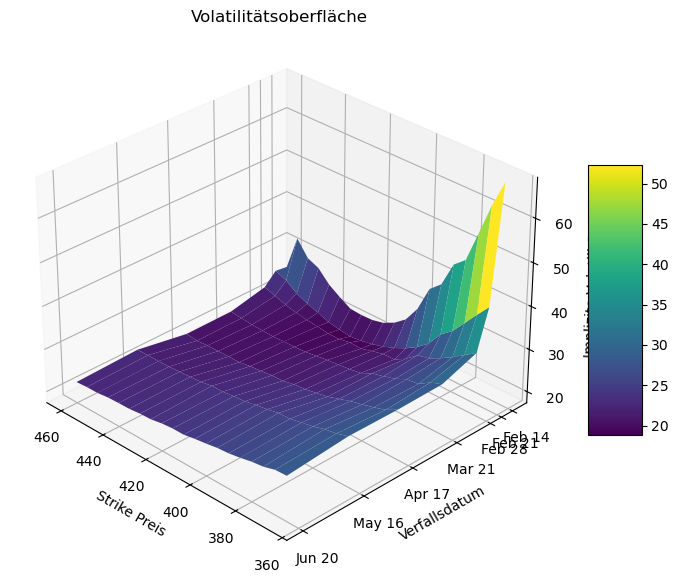

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import datetime

def create_matplotlib_volatility_surface(options_data):
    """
    Erstellt eine 3D-Volatilitätsoberfläche mit Matplotlib basierend auf Optionsdaten.

    Args:
        options_data (dict): Ein Dictionary mit Optionsdaten im Format des Beispiels.

    Returns:
        None: Zeigt das Diagramm an.
    """
    
    # 1. Daten extrahieren und in Pandas DataFrame umwandeln
    data_rows = []
    option_values = options_data['values']
    for expiration_data in options_data['expirations']:
        expiration_date = expiration_data['date']
        for option in expiration_data['options']:
            strike_price = option['strike']
            iv = None
            if 'call' in option and 'id' in option['call']:
                call_option_id = option['call']['id']
                iv_key_call = f"{call_option_id}-iv"
                if iv_key_call in option_values:
                    iv = option_values[iv_key_call]
            elif 'put' in option and 'id' in option['put']:
                put_option_id = option['put']['id']
                iv_key_put = f"{put_option_id}-iv"
                if iv_key_put in option_values:
                    iv = option_values[iv_key_put]
            if iv is not None:
                data_rows.append({
                    'expiration': expiration_date,
                    'strike': strike_price,
                    'implied_volatility': iv
                })

    df = pd.DataFrame(data_rows)

    # 2. Daten für 3D-Plot vorbereiten
    pivot_df = df.pivot_table(index='expiration', columns='strike', values='implied_volatility')

    # Achsenwerte
    expiration_dates = [datetime.datetime.strptime(d, '%Y-%m-%d') for d in pivot_df.index]
    expiration_dates_num = [date.toordinal() for date in expiration_dates]  # In numerische Werte umwandeln
    strike_prices = pivot_df.columns.to_numpy()
    volatility_values = pivot_df.to_numpy()

    # 3. 3D-Plot erstellen
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    X, Y = np.meshgrid(strike_prices, expiration_dates_num)
    Z = volatility_values

    surf = ax.plot_surface(X, Y, Z, cmap='viridis')

    # Achsentitel und Formatierung
    ax.set_xlabel('Strike Preis')
    ax.set_ylabel('Verfallsdatum')
    ax.set_zlabel('Implizite Volatilität')

    # Y-Achse zurückformatieren zu Datum
    ax.set_yticks(expiration_dates_num)
    ax.set_yticklabels([date.strftime('%b %d') for date in expiration_dates])

    # Farbskala hinzufügen
    fig.colorbar(surf, shrink=0.5, aspect=5)

    # Perspektive anpassen
    ax.view_init(elev=30, azim=135)

    plt.title('Volatilitätsoberfläche')
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    create_matplotlib_volatility_surface(options_data)


In [31]:
calls.columns

Index(['contractSymbol', 'lastTradeDate', 'strike', 'lastPrice', 'bid', 'ask',
       'change', 'percentChange', 'volume', 'openInterest',
       'impliedVolatility', 'inTheMoney', 'contractSize', 'currency'],
      dtype='object')

In [37]:
import pandas as pd
import numpy as np

def risikofreie_rendite_berechnen(df_calls, df_puts, current_price):
    """
    Berechnet die risikofreie Rendite basierend auf der Put-Call-Parität.
    
    Parameters:
    df_calls (pd.DataFrame): DataFrame mit Call-Optionen.
    df_puts (pd.DataFrame): DataFrame mit Put-Optionen.
    current_price (float): Aktueller Kurs des Basiswertes.
    
    Returns:
    pd.DataFrame: DataFrame mit berechneter risikofreier Rendite.
    """
    # Sicherstellen, dass Calls und Puts die gleichen Strikes haben
    df = pd.merge(df_calls, df_puts, on='strike', suffixes=('_call', '_put'))
    
    # Konvertiere 'lastTradeDate_call' in datetime und entferne Zeitzone
    df['lastTradeDate_call'] = pd.to_datetime(df['lastTradeDate_call']).dt.tz_localize(None)
    
    # Aktueller Zeitstempel ohne Zeitzone
    jetzt = pd.Timestamp.now().tz_localize(None)
    
    # Berechnung der Zeit bis zum Verfall in Jahren
    df['days_to_expiration'] = (df['lastTradeDate_call'] - jetzt).dt.days
    
    # Testweise ohne Filterung negativer Werte
    df['T'] = df['days_to_expiration'] / 365
    
    # Berechnung der risikofreien Rendite mit der Put-Call-Parität
    df['r'] = - (1 / df['T']) * np.log(df['strike'] / (current_price + df['lastPrice_put'] - df['lastPrice_call']))
    
    return df[['contractSymbol_call', 'contractSymbol_put', 'strike', 'lastPrice_call', 'lastPrice_put', 'r', 'days_to_expiration']]

result = risikofreie_rendite_berechnen(calls, puts, 409)
print(result)

    contractSymbol_call   contractSymbol_put  strike  lastPrice_call  \
0   MSFT250214C00250000  MSFT250214P00250000   250.0          167.48   
1   MSFT250214C00300000  MSFT250214P00300000   300.0          110.85   
2   MSFT250214C00310000  MSFT250214P00310000   310.0          107.50   
3   MSFT250214C00320000  MSFT250214P00320000   320.0           91.64   
4   MSFT250214C00330000  MSFT250214P00330000   330.0           84.32   
5   MSFT250214C00335000  MSFT250214P00335000   335.0           77.91   
6   MSFT250214C00345000  MSFT250214P00345000   345.0           74.13   
7   MSFT250214C00350000  MSFT250214P00350000   350.0           67.34   
8   MSFT250214C00355000  MSFT250214P00355000   355.0           60.73   
9   MSFT250214C00360000  MSFT250214P00360000   360.0           47.75   
10  MSFT250214C00362500  MSFT250214P00362500   362.5           52.78   
11  MSFT250214C00365000  MSFT250214P00365000   365.0           44.80   
12  MSFT250214C00370000  MSFT250214P00370000   370.0           4

In [35]:
calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT250214C00240000,2025-02-12 15:08:15+00:00,240.0,167.62,167.35,168.85,-9.650009,-5.443678,1.0,1,0.000010,True,REGULAR,USD
1,MSFT250214C00250000,2025-02-07 14:46:35+00:00,250.0,167.48,157.40,158.85,0.000000,0.000000,3.0,3,0.000010,True,REGULAR,USD
2,MSFT250214C00270000,2025-02-07 20:30:03+00:00,270.0,139.74,137.40,138.85,0.000000,0.000000,1.0,24,0.000010,True,REGULAR,USD
3,MSFT250214C00300000,2025-02-11 16:30:27+00:00,300.0,110.85,107.30,108.80,0.000000,0.000000,3.0,3,0.000010,True,REGULAR,USD
4,MSFT250214C00310000,2025-01-31 16:09:36+00:00,310.0,107.50,97.35,98.85,0.000000,0.000000,1.0,2,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,MSFT250214C00525000,2025-01-31 20:41:55+00:00,525.0,0.02,0.00,0.01,0.000000,0.000000,3.0,20,0.843752,False,REGULAR,USD
66,MSFT250214C00530000,2025-02-07 14:32:54+00:00,530.0,0.01,0.00,0.01,0.000000,0.000000,4.0,39,0.875001,False,REGULAR,USD
67,MSFT250214C00540000,2025-02-12 16:09:57+00:00,540.0,0.01,0.00,0.01,0.000000,0.000000,4.0,52,0.937501,False,REGULAR,USD
68,MSFT250214C00550000,2025-01-30 18:04:03+00:00,550.0,0.01,0.00,0.01,0.000000,0.000000,1.0,13,0.968750,False,REGULAR,USD


In [36]:
print(puts[['contractSymbol', 'strike', 'lastTradeDate', 'lastPrice']].head())

        contractSymbol  strike             lastTradeDate  lastPrice
0  MSFT250214P00230000   230.0 2025-02-10 15:37:33+00:00       0.01
1  MSFT250214P00250000   250.0 2025-02-07 14:46:47+00:00       0.01
2  MSFT250214P00260000   260.0 2025-01-27 17:20:22+00:00       0.01
3  MSFT250214P00280000   280.0 2025-01-13 17:41:24+00:00       0.09
4  MSFT250214P00290000   290.0 2025-02-07 19:00:27+00:00       0.01


In [40]:
import plotly.graph_objects as go
import pandas as pd

def create_volatility_surface(df):
    """
    Erstellt eine 3D-Volatilitätsoberfläche aus einem DataFrame mit Optionsdaten.
    Dabei wird die Zeitkomponente in 'lastTradeDate' ignoriert und nur das Datum genutzt,
    damit Pivotierungen mehrzeiliger Daten für das gleiche Verfallsdatum möglich sind.

    Args:
        df (pd.DataFrame): Muss Spalten enthalten:
            - 'lastTradeDate' (Datum/Zeit als String oder Timestamp)
            - 'strike' (numerisch)
            - 'impliedVolatility' (numerisch)

    Returns:
        plotly.graph_objects.Figure: Die erstellte Plotly-Figur.
    """

    # 1. Nur das Datum aus lastTradeDate extrahieren (Zeiten ignorieren)
    df['expiration_date'] = pd.to_datetime(df['lastTradeDate']).dt.date

    # 2. Pivot-Tabelle aufbauen, index=expiration_date, columns=strike, values=impliedVolatility
    #    Falls mehrere Einträge pro (expiration_date, strike) vorhanden sind, aggregieren wir per Durchschnitt.
    pivot_df = df.pivot_table(
        index='expiration_date',
        columns='strike',
        values='impliedVolatility',
        aggfunc='mean'
    )

    # 3. Konvertieren zu Listen, die Plotly versteht
    expiration_dates = pivot_df.index.to_list()
    strike_prices = pivot_df.columns.to_list()
    volatility_values = pivot_df.values

    # 4. Surface erstellen
    fig = go.Figure(data=[go.Surface(
        z=volatility_values,
        x=strike_prices,
        y=expiration_dates,
        colorscale='Viridis'
    )])

    # 5. Layout anpassen
    fig.update_layout(
        title='Volatilitätsoberfläche',
        scene=dict(
            xaxis_title='Strike Preis',
            yaxis_title='Expiration Date',
            zaxis_title='Implizite Volatilität',
            xaxis=dict(tickformat=".0f"),
            yaxis=dict(
                tickvals=expiration_dates,
                ticktext=[str(d) for d in expiration_dates],
                autorange='reversed'
            ),
            camera=dict(eye=dict(x=1.2, y=-1.2, z=0.8))
        ),
        margin=dict(l=20, r=20, b=20, t=40)
    )

    return fig

# Beispielaufruf
if __name__ == '__main__':

    # Calls Volatilitätsoberfläche
    fig_calls = create_volatility_surface(calls)
    fig_calls.show()

    # Puts Volatilitätsoberfläche
    fig_puts = create_volatility_surface(puts)
    fig_puts.show()

In [39]:
calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT250214C00240000,2025-02-12 15:08:15+00:00,240.0,167.62,167.35,168.85,-9.650009,-5.443678,1.0,1,0.000010,True,REGULAR,USD
1,MSFT250214C00250000,2025-02-07 14:46:35+00:00,250.0,167.48,157.40,158.85,0.000000,0.000000,3.0,3,0.000010,True,REGULAR,USD
2,MSFT250214C00270000,2025-02-07 20:30:03+00:00,270.0,139.74,137.40,138.85,0.000000,0.000000,1.0,24,0.000010,True,REGULAR,USD
3,MSFT250214C00300000,2025-02-11 16:30:27+00:00,300.0,110.85,107.30,108.80,0.000000,0.000000,3.0,3,0.000010,True,REGULAR,USD
4,MSFT250214C00310000,2025-01-31 16:09:36+00:00,310.0,107.50,97.35,98.85,0.000000,0.000000,1.0,2,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,MSFT250214C00525000,2025-01-31 20:41:55+00:00,525.0,0.02,0.00,0.01,0.000000,0.000000,3.0,20,0.843752,False,REGULAR,USD
66,MSFT250214C00530000,2025-02-07 14:32:54+00:00,530.0,0.01,0.00,0.01,0.000000,0.000000,4.0,39,0.875001,False,REGULAR,USD
67,MSFT250214C00540000,2025-02-12 16:09:57+00:00,540.0,0.01,0.00,0.01,0.000000,0.000000,4.0,52,0.937501,False,REGULAR,USD
68,MSFT250214C00550000,2025-01-30 18:04:03+00:00,550.0,0.01,0.00,0.01,0.000000,0.000000,1.0,13,0.968750,False,REGULAR,USD


In [ ]:
import plotly.graph_objects as go
import pandas as pd
import datetime  # Für Datumsmanipulation

def create_plotly_volatility_surface_v2(options_data):
    """
    Erstellt eine 3D-Volatilitätsoberflächengrafik mit Plotly, die der ersten Grafik ähnlicher sieht,
    basierend auf Optionsdaten.

    Args:
        options_data (dict): Ein Dictionary mit Optionsdaten im Format des Beispiels.

    Returns:
        plotly.graph_objects.Figure: Die erstellte Plotly-Figur.
    """


    # *** Verbesserungen für Ausrichtung und Darstellung ***

    # X-Achse: Strike Preise (wie in der ersten Grafik)
    x_axis_values = calls["strike"]
    x_axis_title = 'Strike Preis'

    # Y-Achse: Verfallsdaten (wie in der ersten Grafik, von "vorne" nach "hinten")
    y_axis_values = expiration_dates_str
    y_axis_title = 'Verfallsdatum'

    # Z-Achse: Implizite Volatilität (Höhe)
    z_axis_values = volatility_values
    z_axis_title = 'Implizite Volatilität'


    # 3. Plotly Surface Plot erstellen (angepasst)
    fig = go.Figure(data=[go.Surface(z=z_axis_values,
                                     x=x_axis_values,  # Strike Preise auf X-Achse
                                     y=y_axis_values,  # Verfallsdaten auf Y-Achse
                                     colorscale='Viridis')])

    # 4. Layout anpassen (verbessert für Ähnlichkeit zur ersten Grafik)
    fig.update_layout(
        title='Volatilitätsoberfläche',
        scene=dict(
            xaxis_title=x_axis_title,
            yaxis_title=y_axis_title,
            zaxis_title=z_axis_title,
            xaxis=dict(tickformat=".0f"), # Keine Dezimalstellen bei Strike-Preisen
            yaxis=dict(
                tickvals=y_axis_values, # Explizite Tick-Werte für Verfallsdaten
                ticktext=[datetime.datetime.strptime(d, '%Y-%m-%d').strftime('%b %d') for d in y_axis_values], # Formatierte Monats- und Tagesanzeige
                autorange='reversed' # Verfallsdaten von vorne nach hinten (früheste zuerst)
            ),
            camera=dict(                                 # Kameraperspektive anpassen
                eye=dict(x=1.2, y=-1.2, z=0.8)         # Position der Kamera (x, y, z Koordinaten)
            )
        ),
        margin=dict(l=20, r=20, b=20, t=40)
    )

    return fig

if __name__ == '__main__':

    fig = create_plotly_volatility_surface_v2(options_data)
    fig.show()